In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
import matplotlib.pyplot as plt
#import string
#punc=string.punctuation

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/NLP/train.csv")
df.dropna(inplace=True)

In [5]:
df=df.drop(100)

In [6]:
df["sex"]=df["sex"].replace("M",1)
df["sex"]=df["sex"].replace("F",0)

In [10]:
df = df[0:100]

In [11]:
df

,ID,keywords,age,sex
1,361410,forum:3;contrat:1;calcul:3;conges:1;mission:4;...,47,1
2,211450,villa:1;location:2;aquitaine:2;maison:1;vacanc...,61,0
3,1368807,trafic:1;tournante:1;drogue:1;france:1;plaque:...,45,1
4,3502570,trafic:1;septembre:1;greve:1;sncf:1;sortir:1;p...,22,1
5,2027488,darmanin:1;pour:1;ferme:1;jcms:1;conjoncture:1...,55,1
...,...,...,...,...
110,257375,previsions:1;08h34:1;8e46:1;cd750ca0bcef:1;lan...,62,0
111,344329,tensions:5;direct:5;manifestation:5;paris:5;fo...,37,1
112,3022100,banque:7;p1_1552772:6;services:6;bancaire:1;ma...,63,1
113,407283,essec:1;une:1;blague:1;antiterroriste_c7bc2fec...,59,1


# CLEAN TRAIN
Segmentation(count format to words format), Cleaning(clean stop_words) & Normalization (apply porter stem etc.)  
(We've tried clean the punctuations and numerical words in keywords, but it shows less accuracy in result so we don't use it.)  
(There are repeated ID in the dataset, but as all the data is daily based include the test file, some ID has the data of over 2200 days and most of them only has 1-2 days, we don't want influence the model through visiting frenquency, so we decide not aggregate the data by ID)

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
stop_words = stopwords.words()
porter = PorterStemmer()
def cleantext(counttext):
    wordcounts=counttext.split(";")
    text=""
    i = 0
    for words in wordcounts:
        wordocr=words.split(":")
        print(i)
        i = i+1
        if len(wordocr)>1 and not wordocr[0] in stop_words :
            wordocr[0]=porter.stem(wordocr[0])
            text+=(wordocr[0]+" ")*int(wordocr[1])

    return text

In [14]:
df=df[df["keywords"].str.contains(":")]

In [15]:

df["keywords"]=df["keywords"].map(lambda x: cleantext(x))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
8
0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
0
1
2
3
4
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
0
1
2
3
4
5
6
0
1
2
3
4
5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
0
1
2
0
1
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
0
1
2
0
1
2
3
4
5
6
7
8
9
10
1

In [16]:
df.dropna(inplace=True)
df.to_csv("train_clean.csv",index=False,sep=',')

In [17]:
df.head()

,ID,keywords,age,sex
1,361410,forum forum forum contrat calcul calcul calcul...,47,1
2,211450,villa locat locat aquitain aquitain maison vac...,61,0
3,1368807,trafic tournant drogu franc plaqu actualit,45,1
4,3502570,trafic septembr greve sncf sortir perturb maga...,22,1
5,2027488,darmanin ferm jcm conjonctur guichet p1_169806...,55,1


# CLEAN TEST 
Segmentation, Cleaning & Normalization (there is no repeated ID in test data)

In [18]:
test=pd.read_csv("/content/drive/MyDrive/NLP/test.csv")  # 311M original
test.dropna(subset=["keywords"], inplace=True) # 285M rows after dropna in keywords
test=test[test["keywords"].str.contains(":")] #only 7 rows lost in this filter

In [21]:
test = test[0:100]

In [22]:
test["keywords"]=test["keywords"].map(lambda x: cleantext(x))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
0
1
2
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
0
1
2
3
4
5
6
0
1
2
3
4
5
6
7
8
0
1
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
0
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
test.dropna(subset=["keywords"], inplace=True)
test.to_csv("test_clean.csv",index=False,sep=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Apply TfidfVectorizer 

In [24]:
df=pd.read_csv("train_clean.csv")
test=pd.read_csv("test_clean.csv")

In [25]:
X_train,X_test,y_train,y_test,z_train,z_test = train_test_split(df["keywords"],df["sex"],df["age"], test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(z_train.shape)
print(z_test.shape)

(80,)
(20,)
(80,)
(20,)
(80,)
(20,)


In [26]:
vc_tf_idf = TfidfVectorizer()
vc_tf_idf.fit(X_train.apply(lambda x: np.str_(x)))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [27]:
print("Vocabulary size: {}".format(len(vc_tf_idf.vocabulary_)))

Vocabulary size: 793


In [28]:
X_train_tf = vc_tf_idf.transform(X_train.apply(lambda x: np.str_(x)))
X_train_tf[:3].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2], dtype=int32),
 array([691, 662, 647, 639, 393, 374, 288, 104,  27, 761, 696, 695, 651,
        613, 612, 509, 494, 442, 374, 306, 280, 105, 766, 186, 178],
       dtype=int32))

# Build model for "Sex" and store result
3 models are tried: MultinomialNB, Logistic regression and Random forest classifier, and we finally chose Logistic Regression model as it has the best AUC and accuracy.

In [29]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_tf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_tf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=2000,max_depth=8)
rfc.fit(X_train_tf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
X_test_tf = vc_tf_idf.transform(X_test.apply(lambda x: np.str_(x)))

In [33]:
predictionsex = dict()
predictionsex["mnb"] = mnb.predict(X_test_tf)
predictionsex["logreg"] = logreg.predict(X_test_tf)
predictionsex["rfc"] = rfc.predict(X_test_tf)

In [34]:
print(classification_report(y_test,predictionsex["mnb"]))
#Test result on MultinomialNB

              precision    recall  f1-score   support

           0       0.31      0.67      0.42         6
           1       0.71      0.36      0.48        14

    accuracy                           0.45        20
   macro avg       0.51      0.51      0.45        20
weighted avg       0.59      0.45      0.46        20



In [35]:
print(classification_report(y_test,predictionsex["logreg"]))
#Test result on LogisticRegression

              precision    recall  f1-score   support

           0       0.38      0.50      0.43         6
           1       0.75      0.64      0.69        14

    accuracy                           0.60        20
   macro avg       0.56      0.57      0.56        20
weighted avg       0.64      0.60      0.61        20



In [36]:
print(classification_report(y_test,predictionsex["rfc"]))
#Test result on Randomforest Classifier

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.75      0.86      0.80        14

    accuracy                           0.70        20
   macro avg       0.62      0.60      0.60        20
weighted avg       0.68      0.70      0.68        20



In [37]:
accuracy_score(y_test,predictionsex["logreg"])
#Logistic regression has the best accuracy

0.6

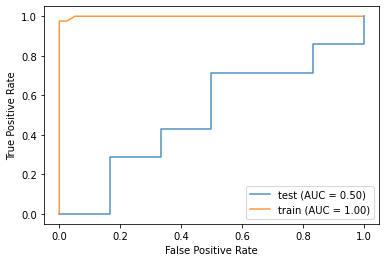

In [38]:
ax = plt.gca()
test_rf = plot_roc_curve(logreg, X_test_tf, y_test,ax=ax, alpha=0.8, name="test")
train_rf = plot_roc_curve(logreg,X_train_tf, y_train,ax=ax, alpha=0.8, name="train")
plt.show()
#AUC curve for Logistic Regression

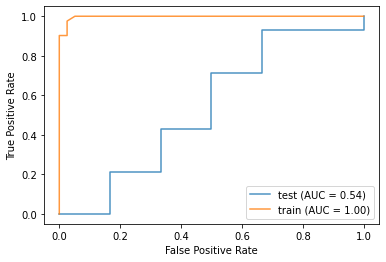

In [39]:
ax = plt.gca()
test_rf = plot_roc_curve(mnb, X_test_tf, y_test,ax=ax, alpha=0.8, name="test")
train_rf = plot_roc_curve(mnb,X_train_tf, y_train,ax=ax, alpha=0.8, name="train")
plt.show()
#AUC curve for MultinomialNB

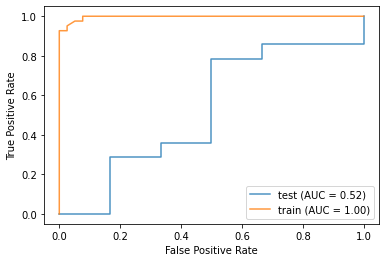

In [40]:
ax = plt.gca()
test_rf = plot_roc_curve(rfc, X_test_tf, y_test,ax=ax, alpha=0.8, name="test")
train_rf = plot_roc_curve(rfc,X_train_tf, y_train,ax=ax, alpha=0.8, name="train")
plt.show()
#AUC curve for RandomForest Classifier

In [41]:
X_test_final = vc_tf_idf.transform(test["keywords"].apply(lambda x: np.str_(x)))

In [42]:
result=pd.DataFrame()
result["ID"]=test["ID"]
result["sex_pred"]=logreg.predict(X_test_final)

In [43]:
result["sex_pred"]=result["sex_pred"].replace(1, "M")
result["sex_pred"]=result["sex_pred"].replace(0, "F")

In [44]:
result.to_csv("test_result.csv",index=False,sep=',')

# Build model for "Age" and store results
Compare to 6 other regressors that we have tried with a small dataset with 50K of rows.   
SGD regressor has the best performance in test.   
6 other regressors are: Logistic Regression, Linear Regression, multinomialNB, Random Forest Regressor, Adabooster Regressor, and Gradientboosting Regressor.   
So for the whole dataset, we only apply SGD regressor to save time.

In [45]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(alpha=0.00001,max_iter=10000,random_state=42)
sgd.fit(X_train_tf,z_train)

SGDRegressor(alpha=1e-05, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [46]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
predictionage = dict()
predictionage["sgd"] = sgd.predict(X_test_tf)
print("Mean square error:%.4f"%(mean_squared_error(z_test,predictionage["sgd"])))
print("Mean absolute error:%.4f"%(mean_absolute_error(z_test,predictionage["sgd"])))
print("R square: ", '{:.2%}'.format(r2_score(z_test,predictionage["sgd"])))

Mean square error:357.6727
Mean absolute error:16.4629
R square:  -272.39%


In [47]:
print(classification_report(np.floor((z_test+5)/10)*10,np.floor((predictionage["sgd"]+5)/10)*10))
# 10 stands for age group between 5-15, 20 stands for age group between 15-25 and so on

              precision    recall  f1-score   support

        20.0       0.00      0.00      0.00         0
        30.0       0.14      0.33      0.20         3
        40.0       0.50      0.25      0.33         4
        50.0       0.60      0.38      0.46         8
        60.0       0.00      0.00      0.00         5
        70.0       0.00      0.00      0.00         0

    accuracy                           0.25        20
   macro avg       0.21      0.16      0.17        20
weighted avg       0.36      0.25      0.28        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
predictionage["dif"]=predictionage["sgd"]-z_test
predictionage["dif"]=predictionage["dif"].map(lambda x: 0 if abs(x)>5 else 1)
print("1 stands for the precision rate of the whole test data")
print(predictionage["dif"].value_counts(1))

1 stands for the precision rate of the whole test data
0    0.8
1    0.2
Name: age, dtype: float64


In [49]:
result=pd.read_csv("test_result.csv")
result["age_pred"]=sgd.predict(X_test_final)
result.to_csv("test_result.csv",index=False,sep=',')